In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.6 MB/s eta 0:00:00m eta 0:00:010:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=e2f09583fdca051cee01344ebc1141ba20f65251a4b95592c8c94f4fd2065d96
  Stored in directory: /home/mluser/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [18]:
image_dir = Path('/home/mluser/Downloads/archive/Dog and Cat .png')

In [5]:
#Create File DataFrame

In [19]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [20]:
image_df

,Filepath,Label
0,/home/mluser/Downloads/archive/Dog and Cat .pn...,Dog
1,/home/mluser/Downloads/archive/Dog and Cat .pn...,Dog
2,/home/mluser/Downloads/archive/Dog and Cat .pn...,Dog
3,/home/mluser/Downloads/archive/Dog and Cat .pn...,Dog
4,/home/mluser/Downloads/archive/Dog and Cat .pn...,Dog
...,...,...
994,/home/mluser/Downloads/archive/Dog and Cat .pn...,Cat
995,/home/mluser/Downloads/archive/Dog and Cat .pn...,Cat
996,/home/mluser/Downloads/archive/Dog and Cat .pn...,Cat
997,/home/mluser/Downloads/archive/Dog and Cat .pn...,Cat


In [21]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [9]:
#Load Image Data

In [22]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [23]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 560 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [12]:
#Training

In [24]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 8s 456ms/step - loss: 0.6942 - acc: 0.4946 - val_loss: 0.6925 - val_acc: 0.6043
Epoch 2/100
18/18 [==============================] - 7s 381ms/step - loss: 0.6931 - acc: 0.5036 - val_loss: 0.6926 - val_acc: 0.4964
Epoch 3/100
18/18 [==============================] - 7s 385ms/step - loss: 0.6889 - acc: 0.5179 - val_loss: 0.6867 - val_acc: 0.6403
Epoch 4/100
18/18 [==============================] - 7s 381ms/step - loss: 0.6806 - acc: 0.5857 - val_loss: 0.6779 - val_acc: 0.5971
Epoch 5/100
18/18 [==============================] - 7s 383ms/step - loss: 0.6683 - acc: 0.6000 - val_loss: 0.6618 - val_acc: 0.6475
Epoch 6/100
18/18 [==============================] - 7s 378ms/step - loss: 0.6601 - acc: 0.6054 - val_loss: 0.6459 - val_acc: 0.6547
Epoch 7/100
18/18 [==============================] - 7s 381ms/step - loss: 0.6650 - acc: 0.6018 - val_loss: 0.6520 - val_acc: 0.6331
Epoch 8/100
18/18 [==============================] - 7s 387ms/step - 

In [14]:
#Results

In [26]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.63428
Test Accuracy: 62.33%


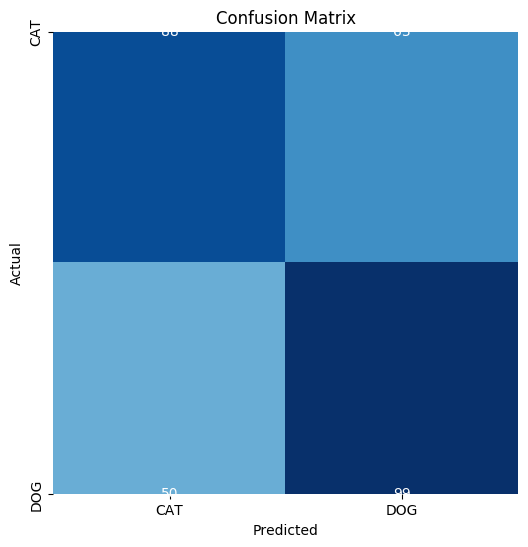

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.64      0.58      0.61       151
         DOG       0.61      0.66      0.64       149

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



In [27]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)